In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [33]:
df = pd.read_csv('03_ICML_Results/training_time_plot.csv')

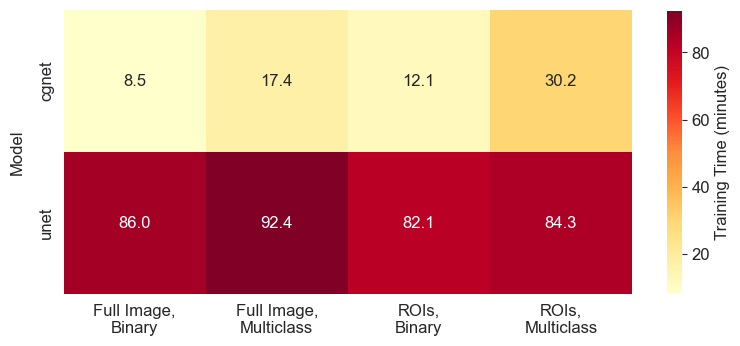

In [34]:
# Convert training_time from HH:MM:SS to minutes for numeric plotting
def time_to_minutes(time_str):
    if pd.isna(time_str) or time_str == 'N/A':
        return np.nan
    h, m, s = time_str.split(':')
    return int(h) * 60 + int(m) + float(s) / 60

df['training_time_minutes'] = df['training_time'].apply(time_to_minutes)

# Create faceted heatmap using seaborn
plt.figure(figsize=(8, 6))
pivot_df = df.pivot_table(
    values='training_time_minutes',
    index='model',
    columns=['roi_mode', 'target_mode'],
    aggfunc='mean'
)

# Format column labels with newline after comma
new_columns = []
for roi_mode, target_mode in pivot_df.columns:
    roi_label = 'Full Image' if roi_mode == 'full' else 'ROIs'
    target_label = 'Multiclass' if target_mode == 'multiclass' else 'Binary'
    new_columns.append(f"{roi_label},\n{target_label}")
pivot_df.columns = new_columns

# Create heatmap with improved formatting
ax = sns.heatmap(pivot_df, 
            annot=True, 
            cmap='YlOrRd', 
            fmt='.1f',  # Changed to 1 decimal place for minutes
            cbar_kws={'label': 'Training Time (minutes)', 'shrink': 0.5},  # Added shrink parameter
            square=True)  # Make cells square

# Make x axis labels horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Improve title and labels
plt.ylabel('Model', labelpad=10)

# Adjust layout
plt.tight_layout()
plt.show()


Total TP: 95.60985459941864, Total FP: 0.046749563165458224, Total FN: 0.06264052191521327, Total TN: 4.280755315500686, Total: 14696640000


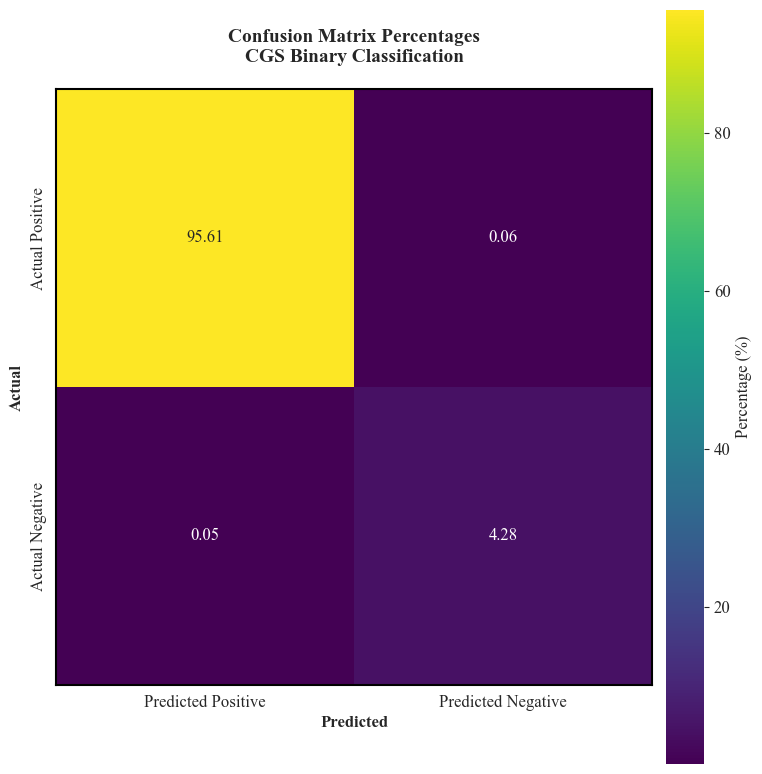

In [35]:
df_cgs_binary = pd.read_csv('03_ICML_Results/CGS_binary_results.csv')

# Calculate overall percentage confusion matrix by summing all values first
total_tp = df_cgs_binary['TP'].sum()
total_fp = df_cgs_binary['FP'].sum()
total_fn = df_cgs_binary['FN'].sum()
total_tn = df_cgs_binary['TN'].sum()
total = total_tp + total_fp + total_fn + total_tn

print(f"Total TP: {total_tp / total * 100}, Total FP: {total_fp / total * 100}, Total FN: {total_fn / total * 100}, Total TN: {total_tn / total * 100}, Total: {total}")

# Create 4x4 confusion matrix percentages
confusion_matrix = pd.DataFrame({
    'Predicted Positive': [total_tp / total * 100, total_fp / total * 100],
    'Predicted Negative': [total_fn / total * 100, total_tn / total * 100]
}, index=['Actual Positive', 'Actual Negative'])

# Set style for IEEE paper
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Create visualization with improved styling for IEEE
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_matrix, 
            annot=True, 
            cmap='viridis',
            fmt='.2f',
            cbar_kws={'label': 'Percentage (%)', 'pad': 0.02},
            square=True,
            ax=ax,
            annot_kws={'size': 12})

# Improve title and labels
plt.title('Confusion Matrix Percentages\nCGS Binary Classification', 
          pad=20, 
          fontsize=14, 
          fontweight='bold')

# Adjust labels
ax.set_xlabel('Predicted', fontsize=12, fontweight='bold')
ax.set_ylabel('Actual', fontsize=12, fontweight='bold')

# Add border
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()


In [36]:
df_cgs_binary

,CNN Model,Input Type,Target Type,Trial,Day,Hour,F1 Score,TP,FP,FN,TN
0,cgnet,rois,binary,1,1,8am,0.000000,1944000,0,0,0
1,cgnet,rois,binary,1,1,9am,0.000000,1944000,0,0,0
2,cgnet,rois,binary,1,1,10am,0.000000,1944000,0,0,0
3,cgnet,rois,binary,1,1,11am,0.000000,1944000,0,0,0
4,cgnet,rois,binary,1,1,12pm,0.000000,1944000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7555,unet,full,binary,3,60,3pm,0.996930,1749908,61,1127,192904
7556,unet,full,binary,3,60,4pm,0.997080,1749928,41,1089,192942
7557,unet,full,binary,3,60,6pm,0.997490,1749920,49,923,193108
7558,unet,full,binary,3,60,7pm,0.998031,1749887,82,681,193350


In [37]:
df_cgs_binary.groupby(['CNN Model','Input Type','Hour']).mean(numeric_only=True)

Trial        Day  F1 Score            TP  \
CNN Model Input Type Hour                                             
cgnet     full       10am    2.0  30.403509  0.931509  1.857817e+06   
                     11am    2.0  30.500000  0.934472  1.857583e+06   
                     12pm    2.0  30.644068  0.933044  1.856789e+06   
                     1pm     2.0  30.000000  0.937074  1.859826e+06   
                     2pm     2.0  30.559322  0.937447  1.857767e+06   
                     3pm     2.0  30.000000  0.935511  1.859350e+06   
                     4pm     2.0  30.881356  0.940546  1.856776e+06   
                     5pm     2.0  29.157895  0.935835  1.862893e+06   
                     6pm     2.0  30.677966  0.940087  1.857311e+06   
                     7pm     2.0  30.694915  0.924333  1.856154e+06   
                     8am     2.0  29.851852  0.929023  1.859356e+06   
                     8pm     2.0  30.438596  0.935188  1.857195e+06   
                     9am     2.0  30.118644  0.932797  1.859139e+06   
          rois       10am    1.5  30.403509  0.927569  1.857837e+06   
                     11am    1.5  30.500000  0.931760  1.857519e+06   
                     12pm    1.5  30.644068  0.932069  1.856841e+06   
                     1pm     1.5  30.000000  0.933779  1.859461e+06   
                     2pm     1.5  30.559322  0.934181  1.857342e+06   
                     3pm     1.5  30.000000  0.934630  1.859264e+06   
                     4pm     1.5  30.881356  0.936833  1.856286e+06   
                     5pm     1.5  29.157895  0.931974  1.862406e+06   
                     6pm     1.5  30.677966  0.934805  1.856735e+06   
                     7pm     1.5  30.694915  0.920325  1.856028e+06   
                     8am     1.5  29.851852  0.925102  1.858752e+06   
                     8pm     1.5  30.438596  0.932213  1.857349e+06   
                     9am     1.5  30.118644  0.927508  1.858594e+06   
unet      full       10am    2.0  30.403509  0.960941  1.858865e+06   
                     11am    2.0  30.500000  0.961863  1.858503e+06   
                     12pm    2.0  30.644068  0.962231  1.857911e+06   
                     1pm     2.0  30.000000  0.962581  1.860417e+06   
                     2pm     2.0  30.559322  0.962416  1.858291e+06   
                     3pm     2.0  30.000000  0.961687  1.860286e+06   
                     4pm     2.0  30.881356  0.963130  1.857317e+06   
                     5pm     2.0  29.157895  0.959666  1.863374e+06   
                     6pm     2.0  30.677966  0.964453  1.857801e+06   
                     7pm     2.0  30.694915  0.961765  1.857657e+06   
                     8am     2.0  29.851852  0.958521  1.860318e+06   
                     8pm     2.0  30.438596  0.964692  1.858507e+06   
                     9am     2.0  30.118644  0.960242  1.859754e+06   
          rois       10am    1.5  30.403509  0.952110  1.858899e+06   
                     11am    1.5  30.500000  0.954188  1.858524e+06   
                     12pm    1.5  30.644068  0.953781  1.857928e+06   
                     1pm     1.5  30.000000  0.954090  1.860395e+06   
                     2pm     1.5  30.559322  0.954553  1.858258e+06   
                     3pm     1.5  30.000000  0.953544  1.860244e+06   
                     4pm     1.5  30.881356  0.955202  1.857286e+06   
                     5pm     1.5  29.157895  0.952480  1.863354e+06   
                     6pm     1.5  30.677966  0.955491  1.857783e+06   
                     7pm     1.5  30.694915  0.953935  1.857648e+06   
                     8am     1.5  29.851852  0.949046  1.860332e+06   
                     8pm     1.5  30.438596  0.952866  1.858490e+06   
                     9am     1.5  30.118644  0.952552  1.859781e+06   

                                    FP           FN            TN  
CNN Model Input Type Hour                                          
cgnet     full       10am  1506.959064  1945.614035  827

In [38]:
df_cgs_binary = pd.read_csv('03_ICML_Results/CGS_multiclass_results.csv')

Computing precision & recall...
Drawing vertically stacked F1 plots...


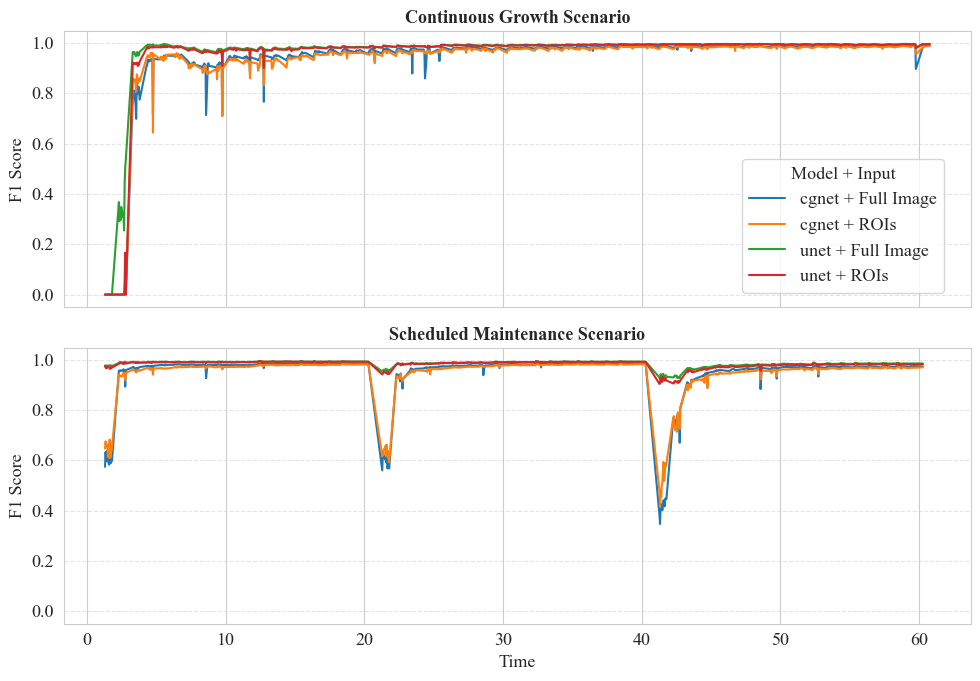

In [ ]:
import matplotlib.pyplot as plt

# Set global font to Times New Roman and consistent font size
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 13

# 1) Load each CSV and tag its dataset
df_cgs = pd.read_csv('03_ICML_Results/CGS_binary_results.csv')
df_cgs['Dataset'] = 'CGS'

df_sms = pd.read_csv('03_ICML_Results/SMS_binary_results.csv')
df_sms['Dataset'] = 'SMS'

# 2) Concatenate dataframes
df = pd.concat([df_cgs, df_sms], ignore_index=True)

hour_options = ['1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm', '12am']

# Map the Hour column to its index in hour_options (if Hour is a string like '8am', '9am', etc.)
df['Hour Index'] = df['Hour'].apply(lambda h: hour_options.index(h) if h in hour_options else None)

df['Time'] = df['Day'] + df['Hour Index'] / 24

print('Computing precision & recall...')

# 4) compute precision & recall
df['Precision'] = df['TP'] / (df['TP'] + df['FP'])
df['Recall']    = df['TP'] / (df['TP'] + df['FN'])

# 5) Aggregate data by trial number
df_agg = df.groupby(['Time','Dataset','CNN Model','Input Type']).agg({
    'Precision': 'mean',
    'Recall': 'mean',
    'F1 Score': 'mean'
}).reset_index()

df_agg['Combo Type'] = df_agg['CNN Model'] + ' + ' + df_agg['Input Type']

df_agg['Combo Type'] = df_agg['Combo Type'].str.replace('cgnet + full', 'cgnet + Full Image')
df_agg['Combo Type'] = df_agg['Combo Type'].str.replace('cgnet + rois', 'cgnet + ROIs')

df_agg['Combo Type'] = df_agg['Combo Type'].str.replace('unet + full', 'unet + Full Image')
df_agg['Combo Type'] = df_agg['Combo Type'].str.replace('unet + rois', 'unet + ROIs')

print('Drawing vertically stacked F1 plots...')

# Prepare the data for each dataset
datasets = ['CGS', 'SMS']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 4), sharey=True, sharex=True)

for i, dataset in enumerate(datasets):
    ax = axes[i]
    df_plot = df_agg[df_agg['Dataset'] == dataset]
    for combo in df_plot['Combo Type'].unique():
        df_combo = df_plot[df_plot['Combo Type'] == combo].sort_values('Time')
        ax.plot(df_combo['Time'], df_combo['F1 Score'], label=combo)
    ax.set_title(f'{dataset.replace("CGS", "Continuous Growth Scenario").replace("SMS", "Scheduled Maintenance Scenario")}', fontsize=13, fontweight='bold', fontname='Times New Roman')
    ax.set_ylabel('F1 Score', fontsize=13, fontname='Times New Roman')
    ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.5)
    if i == 1:
        ax.set_xlabel('Time', fontsize=13, fontname='Times New Roman')
    else:
        ax.set_xlabel('')
    if i == 0:
        # Only show legend on the top plot, near the bottom-right
        legend = ax.legend(
            title='Model + Input',
            bbox_to_anchor=(0.98, 0.02),
            loc='lower right',
            frameon=True
        )
        plt.setp(legend.get_texts(), fontsize=13, fontname='Times New Roman')
        plt.setp(legend.get_title(), fontsize=13, fontname='Times New Roman')

# Set tick label font properties for all axes
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=13)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontname('Times New Roman')
        label.set_fontsize(13)

plt.tight_layout()
plt.show()

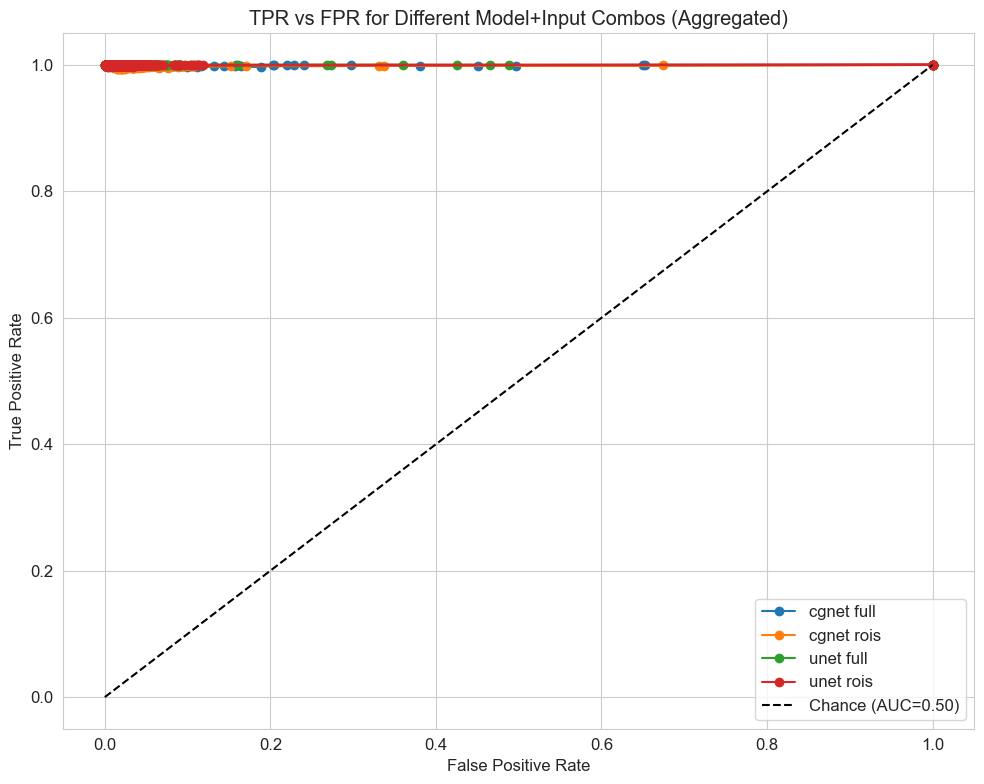

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1) Load each CSV and tag its dataset
df_cgs = pd.read_csv('03_ICML_Results/CGS_binary_results.csv')
df_cgs['Dataset'] = 'CGS'

df_sms = pd.read_csv('03_ICML_Results/SMS_binary_results.csv')
df_sms['Dataset'] = 'SMS'

# 2) Concatenate dataframes
df = pd.concat([df_cgs, df_sms], ignore_index=True)

hour_options = ['1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm', '12am']

# Map the Hour column to its index in hour_options (if Hour is a string like '8am', '9am', etc.)
df['Hour Index'] = df['Hour'].apply(lambda h: hour_options.index(h) if h in hour_options else None)

df['Time'] = df['Day'] + df['Hour Index'] / 24

# 5) Aggregate data by trial number
df_agg = df.groupby(['Time','Dataset','CNN Model','Input Type']).agg({
    'TP': 'mean',
    'FP': 'mean',
    'FN': 'mean',
    'TN': 'mean'
}).reset_index()

df_agg['Combo Type'] = df_agg['CNN Model'] + ' ' + df_agg['Input Type']

plt.figure(figsize=(10, 8))
for combo in df_agg['Combo Type'].unique():
    df_combo = df_agg[df_agg['Combo Type'] == combo].sort_values('Time')
    
    # Calculate TPR and FPR for each time point
    tpr = df_combo['TP'] / (df_combo['TP'] + df_combo['FN'])
    fpr = df_combo['FP'] / (df_combo['FP'] + df_combo['TN'])
    
    plt.plot(fpr, tpr, marker='o', label=f"{combo}")

# chance line
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC=0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TPR vs FPR for Different Model+Input Combos (Aggregated)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
import matplotlib.pyplot as plt

# Set global font to Times New Roman and consistent font size
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 13

# 1) Load each CSV and tag its dataset
df_cgs = pd.read_csv('03_ICML_Results/CGS_multiclass_results.csv')
df_cgs['Dataset'] = 'CGS'

df_sms = pd.read_csv('03_ICML_Results/SMS_multiclass_results.csv')
df_sms['Dataset'] = 'SMS'

# 2) Concatenate dataframes
df = pd.concat([df_cgs, df_sms], ignore_index=True)

hour_options = ['1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm', '12am']

# Map the Hour column to its index in hour_options (if Hour is a string like '8am', '9am', etc.)
df['Hour Index'] = df['Hour'].apply(lambda h: hour_options.index(h) if h in hour_options else None)

df['Time'] = df['Day'] + df['Hour Index'] / 24


# 5) Aggregate data by trial number
df_agg = df.groupby(['Time','Dataset','CNN Model','Input Type']).agg({
    'F1 Score': 'mean'
}).reset_index()

df_agg['Combo Type'] = df_agg['CNN Model'] + ' + ' + df_agg['Input Type']

df_agg['Combo Type'] = df_agg['Combo Type'].str.replace('cgnet + full', 'cgnet + Full Image')
df_agg['Combo Type'] = df_agg['Combo Type'].str.replace('cgnet + rois', 'cgnet + ROIs')

df_agg['Combo Type'] = df_agg['Combo Type'].str.replace('unet + full', 'unet + Full Image')
df_agg['Combo Type'] = df_agg['Combo Type'].str.replace('unet + rois', 'unet + ROIs')

print('Drawing vertically stacked F1 plots...')

# Prepare the data for each dataset
datasets = ['CGS', 'SMS']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 7), sharey=True, sharex=True)

for i, dataset in enumerate(datasets):
    ax = axes[i]
    df_plot = df_agg[df_agg['Dataset'] == dataset]
    for combo in df_plot['Combo Type'].unique():
        df_combo = df_plot[df_plot['Combo Type'] == combo].sort_values('Time')
        ax.plot(df_combo['Time'], df_combo['F1 Score'], label=combo)
    ax.set_title(f'{dataset.replace("CGS", "Continuous Growth Scenario").replace("SMS", "Scheduled Maintenance Scenario")}', fontsize=13, fontweight='bold', fontname='Times New Roman')
    ax.set_ylabel('F1 Score', fontsize=13, fontname='Times New Roman')
    ax.grid(True, which='major', axis='y', linestyle='--', alpha=0.5)
    if i == 1:
        ax.set_xlabel('Time', fontsize=13, fontname='Times New Roman')
    else:
        ax.set_xlabel('')
    if i == 0:
        # Only show legend on the top plot, near the bottom-right
        legend = ax.legend(
            title='Model + Input',
            bbox_to_anchor=(0.98, 0.02),
            loc='lower right',
            frameon=True
        )
        plt.setp(legend.get_texts(), fontsize=13, fontname='Times New Roman')
        plt.setp(legend.get_title(), fontsize=13, fontname='Times New Roman')

# Set tick label font properties for all axes
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=13)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontname('Times New Roman')
        label.set_fontsize(13)

plt.tight_layout()
plt.show()

KeyError: "Column(s) ['F1 Score'] do not exist"